# DataPipeline
Countries: Nigeria, Sierra Leone, and Uganda

## I. NB Setup

In [ ]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
import datetime

In [ ]:
# Set up Google Drive
# drive.mount("/content/gdrive")

# Run below if above command giving some trouble
# drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# WPdx Data

In [ ]:
# Import WPdx data
df_raw = pd.read_csv("https://data.waterpointdata.org/api/views/eqje-vguj/rows.csv?accessType=DOWNLOAD", low_memory=False)
df_raw.pd.to_csv('data/wpdx_sierraleone_nigeria_uganda.csv', low_memory=False)

If for some reason the above cell does not work, you can follow the below instructions to access the data directly from WPdx. 

1. Go to WPdx's database [here](https://data.waterpointdata.org/dataset/Water-Point-Data-Exchange-Plus-WPdx-/eqje-vguj/data)
2. In the filter tab, select '#clean_country_name' with the values 'Sierra Leone', 'Uganda', and 'Nigeria'
3. Go to the export tab and export as csv
4. Put the file in the data tab of this repo (on your local machine), renamed as 'wpdx_sierraleone_nigeria_uganda.csv'

You should now be able to run the code below. 

In [ ]:
# Import Files - only run if previous cell did NOT work
df_raw = pd.read_csv('data/wpdx_sierraleone_nigeria_uganda.csv', low_memory=False)

In [ ]:
# Confirm we're only getting relevant countries
countries = ['Sierra Leone', 'Uganda', 'Nigeria']
df_raw = df_raw[df_raw['#clean_country_name'].isin(countries)]
df_raw = df_raw.reset_index(drop = True)
df_raw.head()

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source_clean,#water_source_category,#water_tech_clean,#water_tech_category,...,#subjective_quality,New Georeferenced Column,lat_lon_deg,public_data_source,converted,count,created_timestamp,updated_timestamp,is_duplicate,dataset_title
0,71905,GRID3,7.880000,5.070000,09/07/2018 12:00:00 AM,Unknown,NaN,NaN,Public Tapstand,Public Tapstand,...,NaN,POINT (5.07 7.88),"(7.88°, 5.07°)",https://catalog.waterpointdata.org/datafiles/g...,NaN,1,12/06/2021 09:12:57 PM,12/06/2021 09:12:57 PM,True,GRID3_Nigeria_2018-2020
1,71934,GRID3,7.670000,5.390000,09/07/2018 12:00:00 AM,Unknown,NaN,NaN,Public Tapstand,Public Tapstand,...,NaN,POINT (5.39 7.67),"(7.67°, 5.39°)",https://catalog.waterpointdata.org/datafiles/g...,NaN,1,12/06/2021 09:12:57 PM,12/06/2021 09:12:57 PM,NaN,GRID3_Nigeria_2018-2020
2,671815,"Federal Ministry of Water Resources, Nigeria",6.776732,9.044447,08/22/2015 12:00:00 AM,Yes,Borehole/Tubewell,Well,Hand Pump,Hand Pump,...,Acceptable quality,POINT (9.0444467 6.7767317),"(6.7767317°, 9.0444467°)",https://catalog.waterpointdata.org/datafiles/f...,"#status_id, #water_source, #pay, #status, #man...",1,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,NaN,Federal Ministry of Water Resources_Nigeria_2015
3,396372,"Federal Ministry of Water Resources, Nigeria",5.866844,7.373515,02/26/2015 12:00:00 AM,Yes,Borehole/Tubewell,Well,Motorized Pump,Motorized Pump,...,Acceptable quality,POINT (7.3735153 5.8668436),"(5.8668436°, 7.3735153°)",https://catalog.waterpointdata.org/datafiles/f...,"#status_id, #water_source, #pay, #status, #man...",1,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,NaN,Federal Ministry of Water Resources_Nigeria_2015
4,674097,"Federal Ministry of Water Resources, Nigeria",6.910172,7.662312,08/30/2015 12:00:00 AM,Yes,Borehole/Tubewell,Well,Hand Pump,Hand Pump,...,Acceptable quality,POINT (7.6623121 6.9101717),"(6.9101717°, 7.6623121°)",https://catalog.waterpointdata.org/datafiles/f...,"#status_id, #water_source, #pay, #status, #man...",1,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,NaN,Federal Ministry of Water Resources_Nigeria_2015


## II. Initial EDA

General Information

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226819 entries, 85 to 305725
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   row_id                       226819 non-null  int64  
 1   #source                      226819 non-null  object 
 2   #lat_deg                     226819 non-null  float64
 3   #lon_deg                     226819 non-null  float64
 4   #report_date                 226819 non-null  object 
 5   #status_id                   226819 non-null  object 
 6   #water_source_clean          210477 non-null  object 
 7   #water_source_category       210477 non-null  object 
 8   #water_tech_clean            139092 non-null  object 
 9   #water_tech_category         138481 non-null  object 
 10  #facility_type               226819 non-null  object 
 11  #clean_country_name          226819 non-null  object 
 12  #clean_country_id            226819 non-null  object 
 13

Columns present

In [ ]:
df_raw_cols = list(df_raw.columns)
print(df_raw_cols)

['row_id', '#source', '#lat_deg', '#lon_deg', '#report_date', '#status_id', '#water_source_clean', '#water_source_category', '#water_tech_clean', '#water_tech_category', '#facility_type', '#clean_country_name', '#clean_country_id', '#clean_adm1', '#clean_adm2', '#clean_adm3', '#clean_adm4', '#install_year', '#installer', '#rehab_year', '#rehabilitator', '#management_clean', '#status_clean', '#pay_clean', '#fecal_coliform_presence', '#fecal_coliform_value', '#subjective_quality_clean', '#activity_id', '#scheme_id', '#wpdx_id', '#notes', '#orig_lnk', '#photo_lnk', '#country_id', '#data_lnk', '#distance_to_primary_road', '#distance_to_secondary_road', '#distance_to_tertiary_road', '#distance_to_city', '#distance_to_town', 'water_point_history', 'local_population_1km', 'water_point_population', 'rehab_priority', '#pop_who_would_gain_access', 'crucialness_score', 'pressure_score', 'usage_capacity', 'days_since_report', 'staleness_score', 'latest_record', 'location_id', 'is_urban', 'cluster_

Number of observations and features

In [ ]:
print('DataFrame Shape:', df_raw.shape)

DataFrame Shape: (226819, 73)


Number of unique waterpoints

In [ ]:
# ID is unique per row = No repeat observations from the same pump?
print('Unique ID count:', len(df_raw['#wpdx_id'].unique()))

Unique ID count: 226819


Earliest and latest observation dates

In [ ]:
print('Earliest observation:', df_raw['#report_date'].min())
print('Latest observation:', df_raw['#report_date'].max())

Earliest observation: 01/01/2010 12:00:00 AM
Latest observation: 12/31/2021 12:00:00 AM


Blank Data

In [ ]:
blanks_list = []
for col in df_raw_cols:
  blanks_list.append([col, df_raw[col].isna().sum()])
print(blanks_list)

[['row_id', 0], ['#source', 0], ['#lat_deg', 0], ['#lon_deg', 0], ['#report_date', 0], ['#status_id', 0], ['#water_source_clean', 16342], ['#water_source_category', 16342], ['#water_tech_clean', 87727], ['#water_tech_category', 88338], ['#facility_type', 0], ['#clean_country_name', 0], ['#clean_country_id', 0], ['#clean_adm1', 0], ['#clean_adm2', 0], ['#clean_adm3', 99447], ['#clean_adm4', 127261], ['#install_year', 73086], ['#installer', 203163], ['#rehab_year', 226679], ['#rehabilitator', 226771], ['#management_clean', 55151], ['#status_clean', 0], ['#pay_clean', 91979], ['#fecal_coliform_presence', 225528], ['#fecal_coliform_value', 226022], ['#subjective_quality_clean', 125354], ['#activity_id', 122651], ['#scheme_id', 215416], ['#wpdx_id', 0], ['#notes', 88825], ['#orig_lnk', 191378], ['#photo_lnk', 119310], ['#country_id', 2704], ['#data_lnk', 0], ['#distance_to_primary_road', 0], ['#distance_to_secondary_road', 0], ['#distance_to_tertiary_road', 0], ['#distance_to_city', 0], ['#

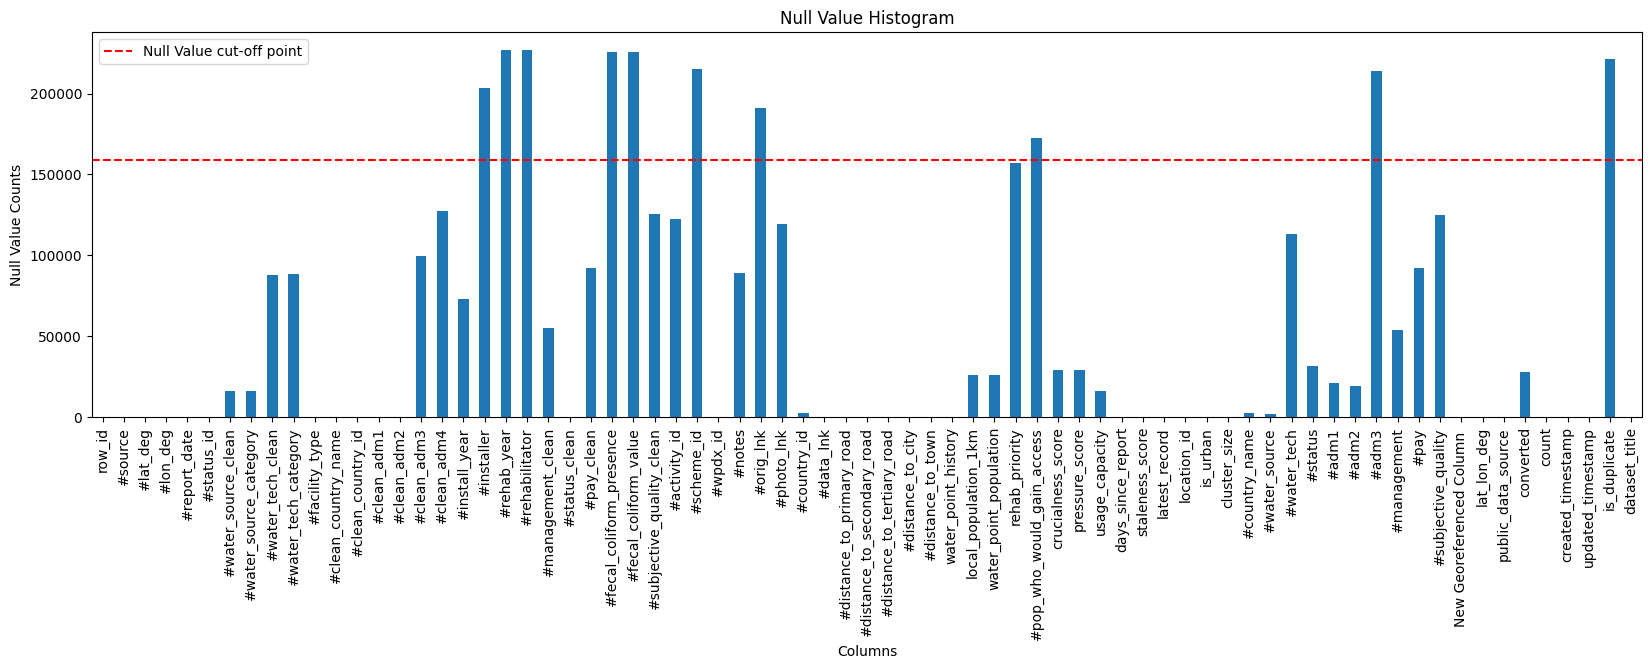

In [ ]:
# Count the number of null values in each column
null_counts = df_raw.isnull().sum()

# Create a histogram of null value counts
plt.figure(figsize=(20,5))
null_counts.plot(kind='bar')
plt.axhline(y=0.7*len(df_raw), color='r', linestyle='--', label='Null Value cut-off point')

# Set the plot title and axes labels
plt.title('Null Value Histogram')
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.legend()

# Display the plot
plt.show()

## III. Cleaning (I)

### Unnest historical data

In [ ]:
import json

# Function to unnest the nested dictionary and create new rows
def extract_history(row):
    history_list = []
    nested_data = ast.literal_eval(row['water_point_history'])
    for date, values in nested_data.items():
        history_list.append(pd.Series(values))
    return history_list

    for date, values in nested_data.items():
        return pd.Series((date))
        history_list.append((row['row_id'], row['#wpdx_id'],row['#lat_deg'], row['#lon_deg'], row['#facility_type'],row['#clean_country_name'], \
                                row['#clean_country_id'], row['#clean_adm1'], row['#clean_adm2'], row['#clean_adm3'], row['#clean_adm4'], row['#install_year'], \
                                row['#management_clean'], row['#status_clean'],row['#pay_clean'], row['#subjective_quality_clean'], row['#activity_id'],
                                row['#distance_to_city'], row['#distance_to_town'], row['local_population_1km'], row['water_point_population'],
                                row['#pop_who_would_gain_access'], row['crucialness_score'], row['pressure_score'], row['usage_capacity'],  \
                                row['#distance_to_primary_road'],row['#distance_to_secondary_road'], row['#distance_to_tertiary_road'], latest_record, \
                                row['is_urban'], i))

        df_cols = ['row_id', '#wpdx_id','#lat_deg', '#lon_deg', '#facility_type', '#clean_country_name',\
                '#clean_country_id', '#clean_adm1', '#clean_adm2', '#clean_adm3', '#clean_adm4', '#install_year', \
                '#management_clean', '#status_clean','#pay_clean', '#subjective_quality_clean', '#activity_id',
                '#distance_to_city', '#distance_to_town', 'local_population_1km', 'water_point_population',
                '#pop_who_would_gain_access', 'crucialness_score', 'pressure_score', 'usage_capacity',  \
                '#distance_to_primary_road','#distance_to_secondary_road', '#distance_to_tertiary_road', 'latest_record', \
                'is_urban','dict']

        df = pd.DataFrame(history_list)
        return df

In [ ]:
def explode_nested_data(row):
    nested_data = row['water_point_history']
    result = []
    for date, nested_dict in nested_data.items():
        # row_dict = row_dict
        row_dict = {'row_id': row['row_id'], 'date': date, '#wpdx_id': row['#wpdx_id'],'#lat_deg': row['#lat_deg'], '#lon_deg': row['#lon_deg'], '#facility_type': row['#facility_type'], \
                    '#clean_country_name': row['#clean_country_name'], '#clean_country_id': row['#clean_country_id'], '#clean_adm1': row['#clean_adm1'], '#clean_adm2': row['#clean_adm2'], \
                    '#clean_adm3': row['#clean_adm3'], '#clean_adm4': row['#clean_adm4'], '#install_year': row['#install_year'], '#management_clean': row['#management_clean'], \
                    '#status_clean': row['#status_clean'],'#pay_clean': row['#pay_clean'], '#subjective_quality_clean': row['#subjective_quality_clean'], '#activity_id': row['#activity_id'], \
                    '#distance_to_city': row['#distance_to_city'], '#distance_to_town': row['#distance_to_town'], 'local_population_1km': row['local_population_1km'], \
                    'water_point_population': row['water_point_population'], '#pop_who_would_gain_access': row['#pop_who_would_gain_access'], 'crucialness_score': row['crucialness_score'], \
                    'pressure_score': row['pressure_score'], 'usage_capacity': row['usage_capacity'], '#distance_to_primary_road': row['#distance_to_primary_road'], \
                    '#distance_to_secondary_road': row['#distance_to_secondary_road'], '#distance_to_tertiary_road': row['#distance_to_tertiary_road'], 'is_urban': row['is_urban']}
        row_dict.update(nested_dict)
        result.append(row_dict)
    return pd.DataFrame(result)



In [ ]:
import ast
# Apply the function to explode the 'nested_data' column
df_raw['water_point_history'] = df_raw['water_point_history'].apply(ast.literal_eval)
exploded_df = df_raw.apply(explode_nested_data, axis=1)

# Concatenate the resulting DataFrames and reset the index
df_unnest_history = pd.concat(exploded_df.tolist()).reset_index(drop=True)

df_unnest_history

In [ ]:
df_unnest_history = df_unnest_history.rename(columns={"source": "#source",
                          "status_id": "#status_id",
                          "water_tech_clean": "#water_tech_clean",
                          "photo_lnk": "#photo_lnk",
                          "water_source_clean": "#water_source_clean",
                          "date": '#report_date'})

In [ ]:
df_unnest_history.head()

,row_id,#report_date,#wpdx_id,#lat_deg,#lon_deg,#facility_type,#clean_country_name,#clean_country_id,#clean_adm1,#clean_adm2,...,usage_capacity,#distance_to_primary_road,#distance_to_secondary_road,#distance_to_tertiary_road,is_urban,#source,#status_id,#water_tech_clean,#photo_lnk,#water_source_clean
0,71905,2018-09-07,6FV7V3JC+222,7.880000,5.070000,Improved,Nigeria,NGA,Ekiti,Ijero,...,NaN,9629.307028,36.216097,670.599031,False,GRID3,Unknown,Public Tapstand,NaN,NaN
1,71934,2018-09-07,6FV7M9CR+222,7.670000,5.390000,Improved,Nigeria,NGA,Ekiti,Irepodun/Ifelodun,...,NaN,6732.221377,566.611844,716.934685,False,GRID3,Unknown,Public Tapstand,NaN,NaN
2,671815,2015-08-22,6FRFQ2GV+MQW,6.776732,9.044447,Improved,Nigeria,NGA,Benue,Vande Ikya,...,300.0,16171.196714,2337.735322,2389.894265,False,"Federal Ministry of Water Resources, Nigeria",Yes,Hand Pump,https://akvoflow-55.s3.amazonaws.com/images/ad...,Borehole/Tubewell
3,396372,2015-02-26,6FQ9V98F+PCJ,5.866844,7.373515,Improved,Nigeria,NGA,Imo,Okigwe,...,300.0,5.463231,5194.955182,907.338600,False,"Federal Ministry of Water Resources, Nigeria",Yes,Motorized Pump,NaN,Borehole/Tubewell
4,674097,2015-08-30,6FR9WM66+3W7,6.910172,7.662312,Improved,Nigeria,NGA,Benue,Ogbadibo,...,300.0,5344.766238,4385.175677,11.982095,False,"Federal Ministry of Water Resources, Nigeria",Yes,Hand Pump,https://akvoflow-55.s3.amazonaws.com/images/30...,Borehole/Tubewell


In [ ]:
df_raw2 = df_raw[['row_id', '#wpdx_id', '#report_date', 'staleness_score']]

df_raw2['#report_date'] = pd.to_datetime(df_raw2['#report_date'])
df_unnest_history['#report_date'] = pd.to_datetime(df_unnest_history['#report_date'])

df_raw2['key'] = df_raw2['#wpdx_id'] + '_' + df_raw2['#report_date'].astype(str)
df_unnest_history['key'] = df_unnest_history['#wpdx_id'] + '_' + df_unnest_history['#report_date'].astype(str)

df_raw2 = df_raw2.drop(columns = ['row_id', '#wpdx_id', '#report_date'])

<ipython-input-55-463aa546c0fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw2['#report_date'] = pd.to_datetime(df_raw2['#report_date'])
<ipython-input-55-463aa546c0fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw2['key'] = df_raw2['#wpdx_id'] + '_' + df_raw2['#report_date'].astype(str)


In [ ]:
print('Before join')
print('df_unnest_history', df_unnest_history.shape)
print('df_raw2', df_raw2.shape)

df_unnest_history_join = pd.merge(df_unnest_history, df_raw2, on='key', how='left')
# df_unnest_history_join = df_unnest_history_join.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])
print()
print('After join')
print('df_unnest_history_join', df_unnest_history_join.shape)

Before join
df_unnest_history (259672, 36)
df_raw2 (226819, 2)

After join
df_unnest_history_join (259672, 37)


259672-226819 # 32853 rows added

### Drop High Null Columns

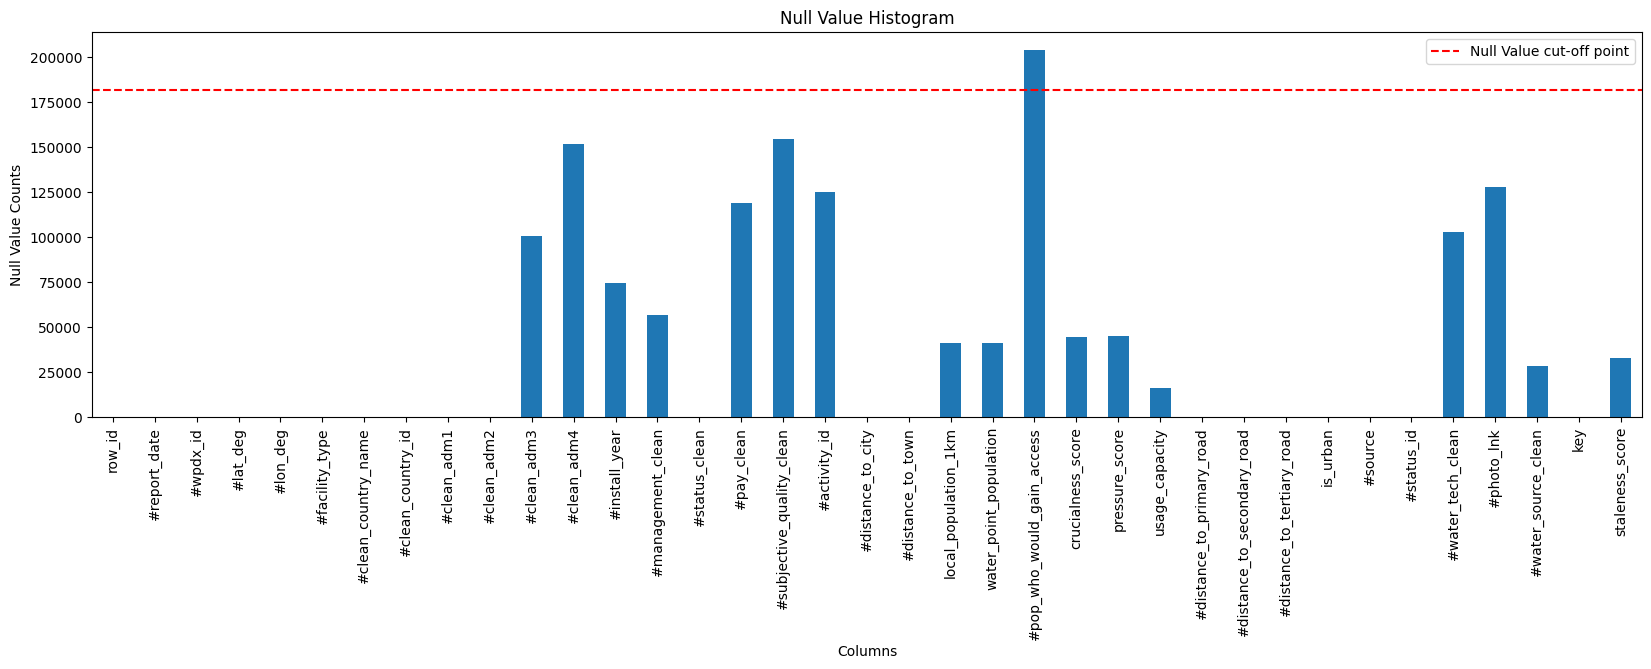

In [ ]:
# Count the number of null values in each column
null_counts = df_unnest_history_join.isnull().sum()

# Create a histogram of null value counts
plt.figure(figsize=(20,5))
null_counts.plot(kind='bar')
plt.axhline(y=0.7*len(df_unnest_history_join), color='r', linestyle='--', label='Null Value cut-off point')

# Set the plot title and axes labels
plt.title('Null Value Histogram')
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Drop High Null Columns

# Get list of high null columns (>80% nulls)
high_null = []
for i in range(len(df_unnest_history_join.isnull().sum())):
  if df_unnest_history_join.isnull().sum()[i] > 0.8*len(df_unnest_history_join):
    high_null.append(df_unnest_history_join.isnull().columns[i])
print(high_null)
# Drop high null columns
df_null_drop = df_unnest_history_join.drop(columns=high_null)

[]


Unfortunately the following columns that could have been useful needed to be dropped:


*   #rehab_year - when a waterpoint had its last major rehabilitation
*   #rehabilitator - name of entity/ies that did the most recent rehabilitation
*   #installer
*   #fecal_coliform_presence
*   #fecal_coliform_value
*   rehab_priority
*   #pop_who_would_gain_access

*Note, that rehabilitation priority comes from a wpdx tool




**Other Data Notes:**

Variables that come from the rehabilitation priority tool:
- Potential population that would regain access if point was repaired (default)
  - too many nulls --> dropped
- Total population within 1km of water point
- Crucialness of water point (i.e., are there alternative water points nearby)
- Pressure on the water point (i.e., is the water point over or under-utilized)

New georeference column will be kept for the purposes of potential mapping later on.

**Notes about columns that are being dropped:**
*   In cases where there are two versions of the same column, only the clean version is kept
*   #notes is an open text column that has additional information not already part of the WPdx standard that is useful to the data provider. The type of information in this column is quite varied and only some may be useful. At this point, it has been decided that parsing this open text column is will not bring enough value for the amount of work that would be needed to gain useful information from it.
*   #status is an open text column about the status of the physical and mechanical condition of the water point. #status_clean incorporates information form this column and is used instead.

In [ ]:
df_preclean = df_null_drop

In [ ]:
print(df_preclean.columns)

Index(['row_id', '#report_date', '#wpdx_id', '#lat_deg', '#lon_deg',
       '#facility_type', '#clean_country_name', '#clean_country_id',
       '#clean_adm1', '#clean_adm2', '#clean_adm3', '#clean_adm4',
       '#install_year', '#management_clean', '#status_clean', '#pay_clean',
       '#subjective_quality_clean', '#activity_id', '#distance_to_city',
       '#distance_to_town', 'local_population_1km', 'water_point_population',
       '#pop_who_would_gain_access', 'crucialness_score', 'pressure_score',
       'usage_capacity', '#distance_to_primary_road',
       '#distance_to_secondary_road', '#distance_to_tertiary_road', 'is_urban',
       '#source', '#status_id', '#water_tech_clean', '#photo_lnk',
       '#water_source_clean', 'key', 'staleness_score'],
      dtype='object')


## III. Target Variable Mapping

### EDA

In [ ]:
df_preclean['#status_id'] = df_preclean['#status_id'].astype('str')

# status_id
pd.DataFrame(df_preclean.groupby(['#status_id'])['row_id'].count())

,row_id
#status_id,
No,58104
Unknown,23676
Yes,177892


Look at **#status_id** for each country to inform mapping

In [ ]:
# Create df for each country
sierraleone_df = df_preclean.loc[df_preclean['#clean_country_name'] == "Sierra Leone"]
uganda_df = df_preclean.loc[df_preclean['#clean_country_name'] == "Uganda"]
nigeria_df = df_preclean.loc[df_preclean['#clean_country_name'] == "Nigeria"]

In [ ]:
sierraleone_df["#status_clean"].value_counts()

Non-Functional                36589
Functional, not in use        12435
Functional                     1785
Abandoned/Decommissioned         36
Non-Functional, dry season       15
Functional, needs repair          1
Name: #status_clean, dtype: int64

In [ ]:
uganda_df["#status_clean"].value_counts()

Functional                    68503
Non-Functional                35056
Functional, not in use         2462
Non-Functional, dry season     1419
Abandoned/Decommissioned        505
Functional, needs repair        317
Name: #status_clean, dtype: int64

In [ ]:
nigeria_df["#status_clean"].value_counts()

Functional, not in use        53121
Non-Functional                44303
Non-Functional, dry season     2462
Abandoned/Decommissioned        357
Functional                      236
Functional, needs repair         70
Name: #status_clean, dtype: int64

In [ ]:
df1 = df_preclean[['#status_id', '#status_clean', '#report_date', '#clean_country_name']]
df1[df1['#status_clean'] == 'Non-Functional, dry season']

In [ ]:
# df_preclean['updated_timestamp'] = pd.to_datetime(df_preclean['updated_timestamp'])

In [ ]:
df1['#status_id'].unique() # This means that we will need to make a column that refers to whether a waterpoint is functional in dry season
# We can't automatically assume it is not functional at all if response is 'Non-Functional, dry season'

array(['Unknown', 'Yes', 'No'], dtype=object)

Dry Season Notes:
- Sierra Leone: December - April
- Nigeria: November - March
- Uganda: June - August & December - February

### Mapping

In [ ]:
def wp_status(row):
  functional = ['Functional', 'Functional, needs repair', 'Functional, not in use']
  not_functional = ['Non-Functional', 'Abandoned/Decommissioned', 'Non-Functional, dry season']
  if row['#status_clean'] in functional:
    status_fin = 'functional'
  else:
    status_fin = 'not_functional'
  return status_fin

In [ ]:
df_preclean['status_fin'] = df_preclean.apply(wp_status, axis=1)

### Final Breakdown

In [ ]:
# status_fin
pd.DataFrame(df_preclean.groupby(['status_fin'])['row_id'].count())

,row_id
status_fin,
functional,138930
not_functional,120742


In [ ]:
120742/259672

0.4649788964539881

In [ ]:
df_preclean.shape

(259672, 38)

Class breakdown:


*   functional: 53.5%
*   not_functional: 46.4%





## V. Cleaning (II)

In [ ]:
df_clean = df_preclean
df_clean.shape

(259672, 39)

In [ ]:
df_clean['report_date'] = pd.to_datetime(df_clean['#report_date'])
df_clean['report_month'] = df_clean['report_date'].apply(lambda x: x.month)
df_clean['report_day'] = df_clean['report_date'].apply(lambda x: x.day)
df_clean['report_year'] = df_clean['report_date'].apply(lambda x: x.year)

**Dates Issues:**


*   some report dates in future; while their updated timestamps are in the past
*   specifically happening for Sierra Leone and Uganda in our dataset




In [ ]:
print('Earliest observation:', df_clean['report_date'].min())
print('Latest observation:', df_clean['report_date'].max())

Earliest observation: 2005-09-07 00:00:00
Latest observation: 2023-12-01 00:00:00


In [ ]:
def clean_install_year(df):
  '''
  Arg:
  Return: clean dataframe

  Does the following:
  - if install year is greater than year timestamp it should be Nan
  '''

  # Clean #install_year
  install_year = df['#install_year']
  if np.where(df[['#install_year', 'report_year']].notnull()):
    if df['#install_year'] > df['report_year']:
      install_year = np.NaN
  else:
    install_year = df['#install_year']

  return install_year

In [ ]:
def create_dry_col(df):
  if df['#status_clean'] == 'Non-Functional, dry season':
    val = 1
  else:
    val = 0
  return val

In [ ]:
def get_source_type(val):
  gov = ['Federal Ministry of Water Resources, Nigeria', 'Ministry of Water and Environment, Uganda', \
              'Ministry of Basic and Senior Secondary Education - Sierra Leone', 'Ministry of Water Resources, \
              Sierra Leone', 'Kenema Water Directorate',
              ]
  un = ['OCHA ROSEA','UNHCR','UNICEF', ]
  ngo = ['iMMAP', 'GOAL','World Vision','charity: water',  'CARE-Uganda-Otuke','World Vision WASH','IRC', \
         'Living Water International',  'Inter Aide', 'WaterAid UK', 'WaterAid', 'The Water Trust', \
         'The Water Trust Uganda',  'Water4','International Lifeline Fund', 'Drop in the Bucket',\
         'Evidence Action', 'Water For People', 'Ugandan Water Project','Stanford University and International Lifeline Fund', \
         'Aquaya','CRS RAIN Project', 'Water for People', ]
  other = ['C & D', 'YouthMappers', 'YouthMappers Gulu Chapter', 'TTC Mobile', 'Lifeline', 'GRID3']

  if val in gov:
    val = 'gov'
  elif val in un:
    val = 'un'
  elif val in ngo:
    val = 'ngo'
  else:
    val = 'other'
  return val

In [ ]:
df_clean['install_year'] = df_clean.apply(lambda s: clean_install_year(s), axis=1)
df_clean['not_func_dry_season'] = df_clean.apply(lambda s: create_dry_col(s), axis=1)
df_clean['source_type'] = df_clean['#source'].apply(lambda x: get_source_type(x))

In [ ]:
# Filter out problematic rows
df_clean = df_clean[df_clean['report_date'] < '2023-06-10']
df_clean.shape

(259518, 46)

In [ ]:
df_clean = df_clean.drop(columns=['#source'])
df_clean.columns

Index(['Unnamed: 0', 'row_id', '#report_date', '#wpdx_id', '#lat_deg',
       '#lon_deg', '#facility_type', '#clean_country_name',
       '#clean_country_id', '#clean_adm1', '#clean_adm2', '#clean_adm3',
       '#clean_adm4', '#install_year', '#management_clean', '#status_clean',
       '#pay_clean', '#subjective_quality_clean', '#activity_id',
       '#distance_to_city', '#distance_to_town', 'local_population_1km',
       'water_point_population', '#pop_who_would_gain_access',
       'crucialness_score', 'pressure_score', 'usage_capacity',
       '#distance_to_primary_road', '#distance_to_secondary_road',
       '#distance_to_tertiary_road', 'is_urban', '#status_id',
       '#water_tech_clean', '#photo_lnk', '#water_source_clean', 'key',
       'staleness_score', 'status_fin', 'report_date', 'report_month',
       'report_day', 'report_year', 'install_year', 'not_func_dry_season',
       'source_type'],
      dtype='object')

Based on the below breakdown as to when a waterpoint is reported to have water available or not (#status_id) and when it is reported as 'Non-functional, dry season', it is alright to assume that the mapping done above which takes into account both the aforementioned columns is correct.

In the case of Sierra Leone and Nigeria, when the 'Non-functional, dry season' is indicated along with there being no water (#status_id = No) , it was reported in non-dry season months for all three countries. This means that these water points really do not work. Only few water points in Uganda were reported 'Non-functional, dry season' and had #status_id as yes and these were also in non-dry season months.

In [ ]:
pd.DataFrame(df_clean[df_clean['#clean_country_name'] == 'Nigeria'].groupby(['#clean_country_name','status_fin','not_func_dry_season', 'report_month'])['row_id'].count())

row_id
#clean_country_name status_fin     not_func_dry_season report_month        
Nigeria             functional     0                   1              18536
                                                       2               5023
                                                       3                211
                                                       4               3042
                                                       5              11211
                                                       6               1701
                                                       7               1918
                                                       8               5260
                                                       9               1387
                                                       10              2998
                                                       11              1881
                                                       12               259
                    not_functional 0                   1               8819
                                                       2               2716
                                                       3               2180
                                                       4               3403
                                                       5               7336
                                                       6               2643
                                                       7               1816
                                                       8               8200
                                                       9               3054
                                                       10              2223
                                                       11              2064
                                                       12               206
                                   1                   1                540
                                                       2                237
                                                       3                  1
                                                       4                 98
                                                       5                594
                                                       6                 79
                                                       7                131
                                                       8                475
                                                       9                 66
                                                       10               160
                                                       11                77
                                                       12                 4

In [ ]:
pd.DataFrame(df_clean[df_clean['#clean_country_name'] == 'Sierra Leone'].groupby(['#clean_country_name','status_fin','not_func_dry_season', 'report_month'])['row_id'].count())

row_id
#clean_country_name status_fin     not_func_dry_season report_month        
Sierra Leone        functional     0                   1                649
                                                       2                 30
                                                       3                 20
                                                       4                  9
                                                       5                100
                                                       6                  9
                                                       7               2740
                                                       8               4343
                                                       9               3229
                                                       10              1438
                                                       11              1073
                                                       12               581
                    not_functional 0                   1               2569
                                                       2               1681
                                                       3               2612
                                                       4               2508
                                                       5               2787
                                                       6                817
                                                       7               2087
                                                       8               3495
                                                       9               3061
                                                       10              2578
                                                       11              2949
                                                       12              9481
                                   1                   7                  3
                                                       8                  2
                                                       9                  9
                                                       10                 1

In [ ]:
pd.DataFrame(df_clean[df_clean['#clean_country_name'] == 'Uganda'].groupby(['#clean_country_name','status_fin','not_func_dry_season', 'report_month'])['row_id'].count())

row_id
#clean_country_name status_fin     not_func_dry_season report_month        
Uganda              functional     0                   1                426
                                                       2               2650
                                                       3               2236
                                                       4              18117
                                                       5              19504
                                                       6               8186
                                                       7               4631
                                                       8               7572
                                                       9               4934
                                                       10              2406
                                                       11               357
                                                       12               263
                    not_functional 0                   1               1175
                                                       2               1763
                                                       3               4592
                                                       4               6145
                                                       5               6527
                                                       6               2961
                                                       7               1638
                                                       8               2596
                                                       9               3450
                                                       10              2947
                                                       11               907
                                                       12               706
                                   1                   1                  4
                                                       3                 81
                                                       5                263
                                                       6                112
                                                       7                 88
                                                       8                 22
                                                       9                 34
                                                       10                12
                                                       11               803

In [ ]:
pd.DataFrame(df_clean.groupby(['#clean_country_name','report_year'])['row_id'].count())

row_id
#clean_country_name report_year        
Nigeria             2010             31
                    2013             69
                    2014             72
                    2015          86117
                    2016             80
                    2017             97
                    2018          12516
                    2019           1464
                    2020             72
                    2021             19
                    2022             12
Sierra Leone        2009              6
                    2010           1619
                    2013              5
                    2014             41
                    2015             25
                    2016          19137
                    2018            378
                    2019           6481
                    2020           2142
                    2021           3297
                    2022          11897
                    2023           5833
Uganda              2005            669
                    2010          74879
                    2011           2213
                    2012           4240
                    2013           4381
                    2014           4817
                    2015           2992
                    2016            502
                    2017            970
                    2018            590
                    2019           1740
                    2020            885
                    2021           1649
                    2022           5998
                    2023           1583

In [ ]:
pd.DataFrame(df_clean.groupby(['report_year'])['row_id'].count()).T

report_year,2005,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
row_id,669,6,76529,2213,4240,4455,4930,89134,19719,1067,13484,9685,3099,4965,17907,7416


In [ ]:
df_clean = df_clean.drop(columns=['#install_year', '#report_date'])

# Secondary Data
[Global Data Lab](https://globaldatalab.org/)

[World Bank Development Indicators](https://databank.worldbank.org/source/world-development-indicators)

## I. Load

In [ ]:
# Load secondary data
# FILE_PATH = '/content/gdrive/My Drive/Capstone_Sum23/03_Data/01_wpdx/'
# FILE_PATH2 = '/content/gdrive/My Drive/Capstone_Sum23/03_Data/02_secondary/'

# Load wpdx data
wpdx_df = df_clean

# Load secondary indicators - country level
country2_df = pd.read_csv('data/esg_data_country.csv')

# Load secondary indicators - region level
region2_df = pd.read_csv('data/gdl_data_region.csv')


<ipython-input-109-f784c3c75f1f>:6: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  wpdx_df = pd.read_csv(FILE_PATH + 'clean_mapped_wpdx_sierraleone_nigeria_uganda_v2.csv')


## II. Initial EDA/Cleaning

General Information

In [ ]:
country2_df.info()
# Not too many nulls. Since it is not decided how the data will be split, nulls will not be replaced (not too many and tree models can handle it).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country                                                                                         54 non-null     object 
 1   Year                                                                                            54 non-null     int64  
 2   Access to electricity (% of population)                                                         48 non-null     float64
 3   Agricultural land (% of land area)                                                              48 non-null     float64
 4   Agriculture, forestry, and fishing, value added (% of GDP)                                      53 non-null     float64
 5   Annual freshwater

In [ ]:
region2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1088 non-null   object 
 1   Region                       1088 non-null   object 
 2   Year                         1088 non-null   int64  
 3   log_gni_cap_1000usd_2011ppp  1088 non-null   float64
 4   hdi                          1088 non-null   float64
 5   perc_emp_women_agric         1066 non-null   object 
 6   perc_emp_men_agric           1066 non-null   object 
 7   avg_yrs_school_female        1088 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 68.1+ KB


Columns Present

In [ ]:
print(list(country2_df.columns))

['Country', 'Year', 'Access to electricity (% of population)', 'Agricultural land (% of land area)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Annual freshwater withdrawals, total (% of internal resources)', 'Cooling Degree Days', 'GDP growth (annual %)', 'Government Effectiveness: Estimate', 'Heat Index 35', 'Heating Degree Days', 'Land Surface Temperature', 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources', 'Political Stability and Absence of Violence/Terrorism: Estimate', 'Regulatory Quality: Estimate', 'Rule of Law: Estimate', 'Voice and Accountability: Estimate']


In [ ]:
print(list(region2_df.columns))

['Country', 'Region', 'Year', 'log_gni_cap_1000usd_2011ppp', 'hdi', 'perc_emp_women_agric', 'perc_emp_men_agric', 'avg_yrs_school_female']


## III. Join Secondary Data with WPdx

In [ ]:
# Join wpdx and country indicators
wpdx_df['country2_key'] = wpdx_df['#clean_country_name'] + '_' + wpdx_df['report_year'].astype(str)
country2_df['country2_key'] = country2_df['Country'] + '_' + country2_df['Year'].astype(str)

print('Before join')
print('wpdx', wpdx_df.shape)
print('country2', country2_df.shape)

wpdx_df2 = pd.merge(wpdx_df, country2_df, on='country2_key', how='left')
wpdx_df2 = wpdx_df2.drop(columns = ['Unnamed: 0.1','Unnamed: 0', 'Country', 'Year'])
print()
print('After join')
print('wpdx2', wpdx_df2.shape)

Before join
wpdx (259518, 45)
country2 (54, 18)

After join
wpdx2 (259518, 58)


In [ ]:
def wpdx_region_key(df):
  if df['#clean_country_name'] == 'Sierra Leone':
    result = str(df['#clean_country_name']) + '_' + str(df['#clean_adm2']) + '_' + str(df['report_year'])
  else:
    result = str(df['#clean_country_name']) + '_' + str(df['#clean_adm1']) + '_' + str(df['report_year'])
  return result

In [ ]:
# Join wpdx_country with region indicators
wpdx_df2['region2_key'] = wpdx_df2.apply(lambda s: wpdx_region_key(s), axis=1)
region2_df['region2_key'] = region2_df['Country'] + '_' + region2_df['Region'] + '_' + region2_df['Year'].astype(str)

print('Before join')
print('wpdx2', wpdx_df2.shape)
print('region2', region2_df.shape)

wpdx_df3 = pd.merge(wpdx_df2, region2_df, on='region2_key', how='left')
wpdx_df3 = wpdx_df3.drop(columns = ['Country', 'Region', 'Year'])
print()
print('After join')
print('wpdx3', wpdx_df3.shape)

Before join
wpdx2 (259518, 59)
region2 (1088, 9)

After join
wpdx3 (259518, 64)


In [ ]:
df_joined = wpdx_df3
df_joined

,row_id,#wpdx_id,#lat_deg,#lon_deg,#facility_type,#clean_country_name,#clean_country_id,#clean_adm1,#clean_adm2,#clean_adm3,...,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,region2_key,log_gni_cap_1000usd_2011ppp,hdi,perc_emp_women_agric,perc_emp_men_agric,avg_yrs_school_female
0,71905,6FV7V3JC+222,7.880000,5.070000,Improved,Nigeria,NGA,Ekiti,Ijero,NaN,...,-2.101823,-0.864204,-0.903243,-0.430503,Nigeria_Ekiti_2018,8.5120,0.6100,0,33.7,8.4330
1,71934,6FV7M9CR+222,7.670000,5.390000,Improved,Nigeria,NGA,Ekiti,Irepodun/Ifelodun,NaN,...,-2.101823,-0.864204,-0.903243,-0.430503,Nigeria_Ekiti_2018,8.5120,0.6100,0,33.7,8.4330
2,671815,6FRFQ2GV+MQW,6.776732,9.044447,Improved,Nigeria,NGA,Benue,Vande Ikya,NaN,...,-1.925443,-0.866751,-0.967467,-0.372614,Nigeria_Benue_2015,8.2910,0.5540,41.1,64.1,4.7490
3,396372,6FQ9V98F+PCJ,5.866844,7.373515,Improved,Nigeria,NGA,Imo,Okigwe,NaN,...,-1.925443,-0.866751,-0.967467,-0.372614,Nigeria_Imo_2015,8.9810,0.6080,8.34,10.2,8.1870
4,674097,6FR9WM66+3W7,6.910172,7.662312,Improved,Nigeria,NGA,Benue,Ogbadibo,NaN,...,-1.925443,-0.866751,-0.967467,-0.372614,Nigeria_Benue_2015,8.2910,0.5540,41.1,64.1,4.7490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259513,113355,6GHM3W47+29J,1.055088,33.913393,Improved,Uganda,UGA,Eastern,Kibuku,Kibuku,...,-1.000558,-0.201333,-0.396870,-0.518370,Uganda_Eastern_2010,7.3885,0.5025,78.2,65.15,4.8885
259514,168160,6GJPHJGW+7W3,2.575640,34.647301,Improved,Uganda,UGA,Northern,Moroto,Matheniko,...,-1.000558,-0.201333,-0.396870,-0.518370,Uganda_Northern_2010,7.2465,0.4560,58.15,68.55,3.2800
259515,109675,6GGMJ863+PJ9,0.611798,33.304118,Improved,Uganda,UGA,Eastern,Jinja,Butembe,...,-1.000558,-0.201333,-0.396870,-0.518370,Uganda_Eastern_2010,7.3885,0.5025,78.2,65.15,4.8885
259516,751757,6GHP374C+Q6M,1.056971,34.270544,Improved,Uganda,UGA,Eastern,Mbale,Bungokho,...,-0.941126,-0.256649,-0.394621,-0.585784,Uganda_Eastern_2014,7.4765,0.5115,64.2,49.3,4.1210


In [ ]:
# FILE_PATH3 = '/content/gdrive/My Drive/Capstone_Sum23/03_Data/'

df_joined.to_csv('data/clean_final_full_dataset_v2.csv')

In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259518 entries, 0 to 259517
Data columns (total 64 columns):
 #   Column                                                                                          Non-Null Count   Dtype  
---  ------                                                                                          --------------   -----  
 0   row_id                                                                                          259518 non-null  int64  
 1   #wpdx_id                                                                                        259518 non-null  object 
 2   #lat_deg                                                                                        259518 non-null  float64
 3   #lon_deg                                                                                        259518 non-null  float64
 4   #facility_type                                                                                  259518 non-null  object 
 5   #c